In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.pecan_dataport.participant_preprocessing import PecanParticipantPreProcessing
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
pecan_dataset = PecanParticipantPreProcessing('661_test_30_all', 'data/participants_data/1min/',60)

[!] - Trainable dataframe shape - (129086, 28)
[*] Train dataframe shape: (90360, 28)
[*] Validation dataframe shape: (25817, 28)
[*] Test dataframe shape: (12909, 28)


100%|█████████████████████████████████████████████████████████████████████████| 25757/25757 [00:01<00:00, 13417.04it/s]

[!] Train sequence shape: (60, 28)
[!] Val sequence shape: (60, 28)


In [3]:
pecan_std_df = pecan_dataset.total_df #Dataframe com dados pre-processados normalizados

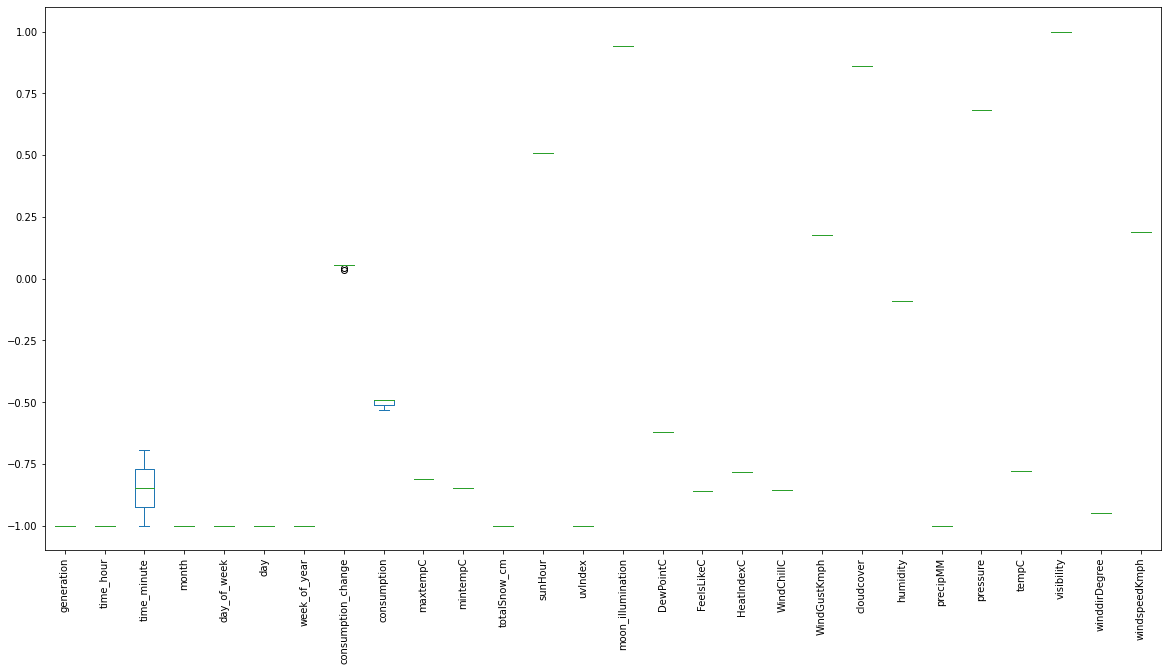

In [4]:
pecan_std_df.head(10).plot.box(figsize=(20, 10), rot=90)
plt.show()

In [5]:
features_names = [x for x in pecan_std_df.columns if x != "consumption"]
features_values = pecan_std_df[features_names].values
target_values = np.array(pecan_std_df['consumption'])

In [6]:
pca = PCA(n_components = 0.99)
features_pca = pca.fit(pecan_std_df)
loadings = features_pca.components_

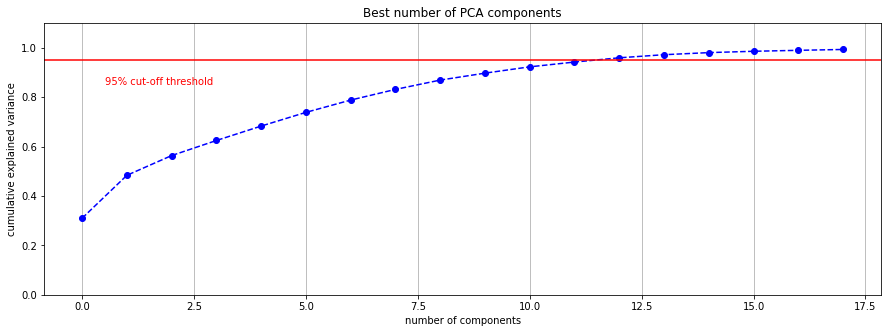

In [9]:
plt.figure(figsize=(15, 5))
plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red')
plt.title("Best number of PCA components")
plt.savefig(f'methodology/imgs/results/metrics/number_of_PCA_Componentes.eps', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/metrics/number_of_PCA_Componentes.png', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/metrics/number_of_PCA_Componentes.svg', dpi=600, bbox_inches='tight')
plt.grid(axis='x')

In [8]:
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
indexes = dict(zip())
pd.concat([expVar, cumVar], axis=1).rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,30.993284,30.993284
PC2,17.364400,48.357684
2,7.991447,56.349131
3,6.098812,62.447944
4,5.839158,68.287101
5,5.543827,73.830929
6,4.976453,78.807382
7,4.316159,83.123541
8,3.770264,86.893805
9,2.810980,89.704785


In [9]:
pca_result_df = pd.DataFrame(pca.components_, columns = pecan_std_df.columns)
pca_result_df

,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,consumption_change,consumption,maxtempC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0.006186,-0.016917,0.000136,-0.434566,-0.100375,-0.120660,-0.341717,-0.000025,-0.000673,-0.242252,...,-0.238563,-0.038905,-0.166013,-0.194728,-0.010431,0.225007,-0.232950,0.055401,-0.055946,-0.034873
1,-0.197498,-0.069085,0.000263,-0.241036,0.174033,-0.028033,-0.186509,0.000138,0.053131,-0.088693,...,-0.043511,0.018236,0.596804,0.308768,0.016150,-0.037467,-0.042759,-0.206917,0.014598,0.017895
2,0.160278,0.264119,-0.000521,-0.567975,0.238337,0.245528,-0.331639,-0.000178,-0.037700,0.135930,...,0.175209,-0.001317,-0.222117,-0.029160,-0.010771,-0.103239,0.166511,0.054357,0.236461,-0.000919
3,0.027073,0.162033,0.000319,0.196229,0.809935,-0.433394,-0.075139,0.000049,0.016054,-0.018513,...,-0.000728,-0.069658,-0.137152,-0.050229,-0.020770,-0.012018,-0.001459,0.012307,-0.071943,-0.062544
4,-0.144902,-0.599729,-0.000382,-0.009270,0.240299,-0.054775,-0.045903,0.000288,0.049964,0.078491,...,-0.066339,-0.033259,-0.089566,0.132458,0.006004,0.027254,-0.072218,-0.112660,-0.053835,-0.067270
5,0.066734,0.506660,-0.000977,0.126386,-0.198525,-0.399666,-0.037489,-0.000124,-0.028531,-0.077659,...,0.045118,0.016428,0.164330,-0.099989,0.005484,0.027218,0.048624,0.026547,-0.254114,0.039505
6,0.000746,0.000494,0.999983,-0.000207,-0.000801,-0.000721,-0.000348,0.000001,0.005484,0.000320,...,0.000188,0.000009,-0.000389,0.000086,-0.000010,-0.000324,0.000155,0.000126,0.000156,-0.000186
7,0.297062,-0.307200,-0.000253,0.030566,-0.211510,-0.561739,-0.164885,-0.001090,-0.096304,0.050416,...,0.058927,0.084110,0.055349,-0.118583,-0.011895,-0.136138,0.073416,-0.043357,0.573428,0.134433
8,0.654794,-0.255620,0.001133,-0.027831,0.092497,0.162658,0.031647,-0.002767,-0.196291,-0.054696,...,0.102167,-0.285468,0.271718,-0.249019,0.005521,0.149365,0.091845,-0.126295,-0.333684,-0.118240
9,0.145291,-0.090310,0.000729,0.072999,0.252487,0.225205,0.114263,-0.000785,-0.045296,-0.112406,...,-0.078079,0.495444,0.129711,-0.170515,0.004590,0.049306,-0.022770,0.420016,0.047837,0.525563


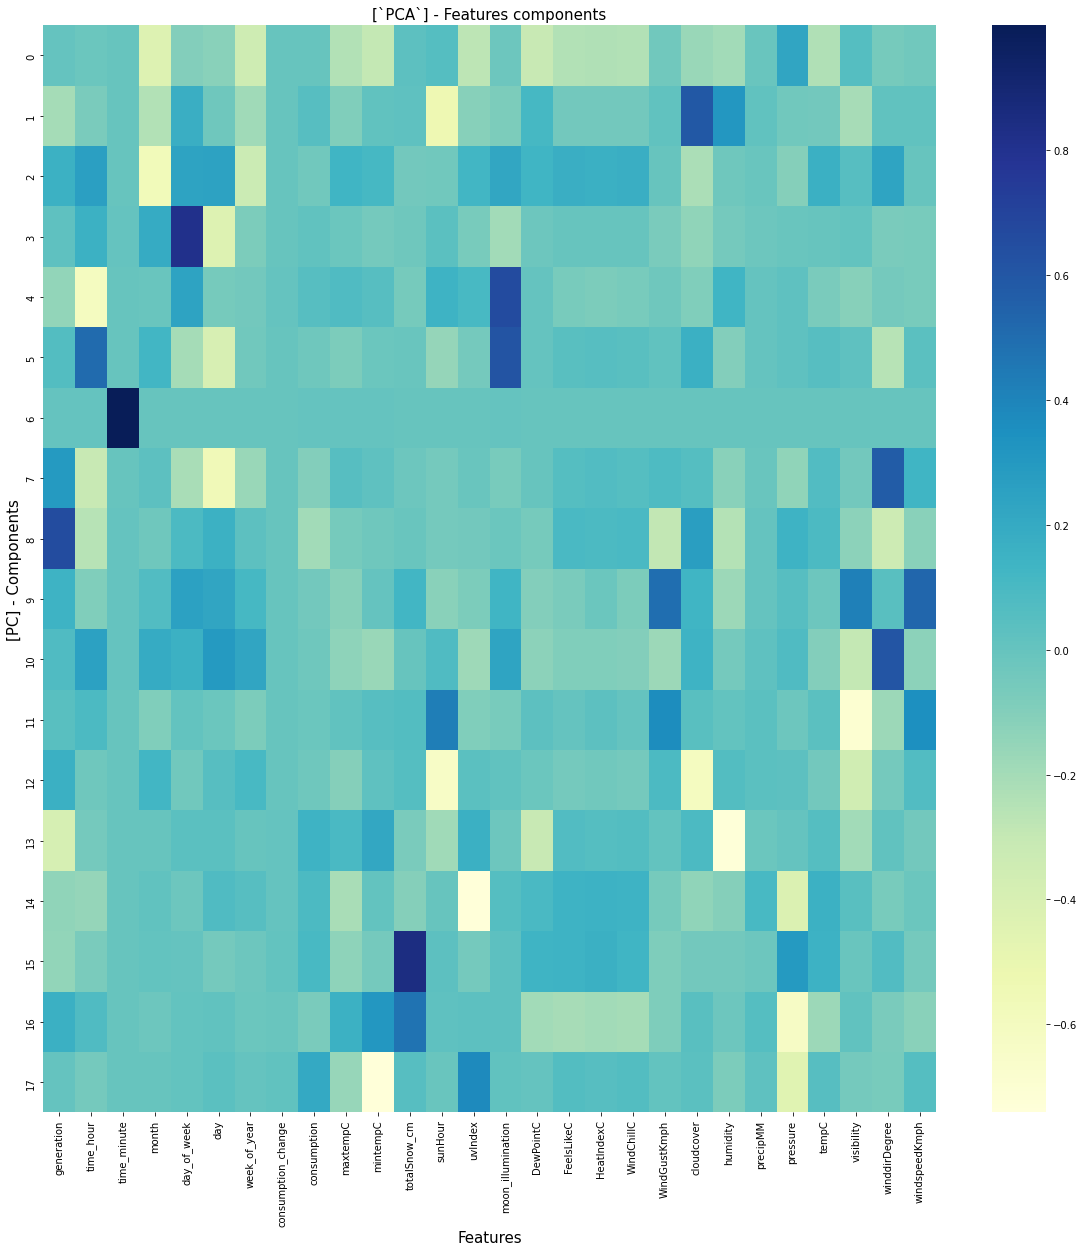

In [10]:

plt.figure(figsize=(20, 20))
plt.title(f'[`PCA`] - Features components', fontsize=15)

ax = sns.heatmap(pca_result_df,  cmap="YlGnBu")
plt.xlabel('Features', fontsize=15)
plt.ylabel('[PC] - Components', fontsize=15)
# plt.savefig(f'etc/imgs/features/feature_importance_PCA_661_test_13.svg', dpi=600, bbox_inches='tight')
plt.show()

In [11]:
n_pcs= pca.n_components_ 
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = pecan_std_df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

np.abs(pca.components_[1])
most_important_names
most_important_names.append('consumption')

most_important_names

['month',
 'cloudcover',
 'month',
 'day_of_week',
 'moon_illumination',
 'moon_illumination',
 'time_minute',
 'winddirDegree',
 'generation',
 'windspeedKmph',
 'winddirDegree',
 'visibility',
 'sunHour',
 'humidity',
 'uvIndex',
 'totalSnow_cm',
 'pressure',
 'mintempC',
 'consumption']

In [11]:
importante_features_df = pecan_std_df[most_important_names]
importante_features_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,129086.0,-0.003982,0.829240,-1.0,-1.000000,0.000000,1.000000,1.0
cloudcover,129086.0,-0.076207,0.780366,-1.0,-0.900000,-0.140000,0.780000,1.0
month,129086.0,-0.003982,0.829240,-1.0,-1.000000,0.000000,1.000000,1.0
day_of_week,129086.0,-0.013965,0.661662,-1.0,-0.666667,0.000000,0.666667,1.0
moon_illumination,129086.0,-0.066645,0.623957,-1.0,-0.600000,-0.100000,0.480000,1.0
moon_illumination,129086.0,-0.066645,0.623957,-1.0,-0.600000,-0.100000,0.480000,1.0
time_minute,129086.0,-0.000116,0.587066,-1.0,-0.525424,-0.016949,0.491525,1.0
winddirDegree,129086.0,-0.212367,0.514525,-1.0,-0.711111,-0.133333,0.038889,1.0
generation,129086.0,-0.729020,0.486788,-1.0,-1.000000,-1.000000,-0.702507,1.0
windspeedKmph,129086.0,-0.317943,0.303441,-1.0,-0.571429,-0.333333,-0.142857,1.0


In [13]:
importante_features_df.isnull().sum()

month                0
cloudcover           0
month                0
day_of_week          0
moon_illumination    0
moon_illumination    0
time_minute          0
winddirDegree        0
generation           0
windspeedKmph        0
winddirDegree        0
visibility           0
sunHour              0
humidity             0
uvIndex              0
totalSnow_cm         0
pressure             0
mintempC             0
consumption          0
dtype: int64